<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

## <center> Synthetic data - Dike model <center> 

--------------------------------------------------------------------------------------------------------------------

In [1]:
################ python internal packages ###############
import numpy as np
import pylab as py
import pandas as pd
import scipy as sp
from scipy import stats
import pandas as pd
from matplotlib import widgets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
from IPython.display import Latex
#########################################################

In [2]:
################### import external packages #################
from modules.sphere import sphere_gz
from modules.plots import rectangle
##############################################################

## <center> Step # 01: Read synthetic data and the dike model info <center>

In [3]:
# read data file using pandas package:
data = pd.read_csv('Synthetic/synthetic_data.txt', sep = ' ')
dike = pd.read_csv('Synthetic/dike_model.txt', sep = ' ')
print dike

     xmin    xmax   ymin   ymax   zmin    zmax  density(kg/m3)
0 -1000.0  1000.0 -500.0  500.0  500.0  3000.0          2900.0


In [4]:
data.min()

X(m)       -5000.000000
Y(m)       -5000.000000
elev(m)     -500.000000
gz(mgal)       0.855875
dtype: float64

In [5]:
data.max()

X(m)        5000.000000
Y(m)        5000.000000
elev(m)     -500.000000
gz(mgal)      22.800311
dtype: float64

In [6]:
# --- convert to array for computing stuff ----- :
area = np.array( dike )
dike = np.copy(area)
dike = dike.T
area = area[0,0:4] 

In [7]:
## For the case where you know that your data is actually an equally-spaced interpolated data:

In [8]:
# create working arrays from read data:
x  = np.array(data.iloc[:,0] )
y  = np.array(data.iloc[:,1] )
z  = np.array(data.iloc[:,2] )
gz = np.array(data.iloc[:,3] )

# get the correct number of dimensions:
ndata = np.size(x)
nx = np.sqrt(ndata) # equal number of rows and columns.
# reshape arrays:
xobs  = np.array( np.split(x, nx) )
yobs  = np.array( np.split(y, nx) )
zobs  = np.array( np.split(z, nx) )
gz_real = np.array( np.split(gz,nx) )

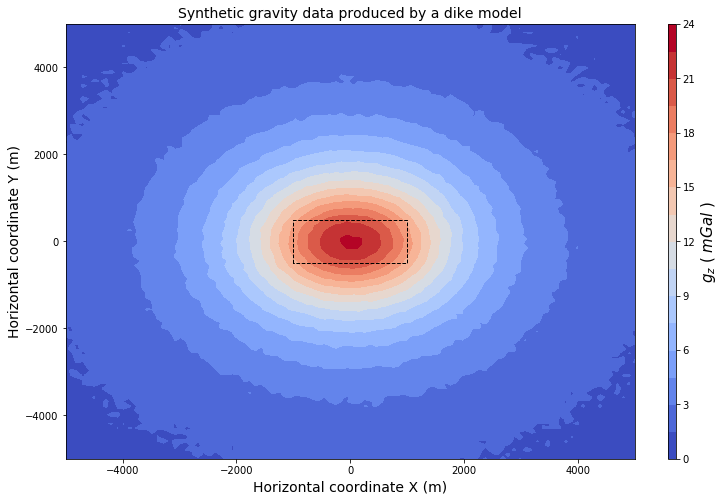

In [9]:
# Ploting the data to see if it's ok so far:
plt.close('all')
fig = plt.figure(figsize=(12,8))
fs = 14
# draw the edges of the dike for better vizualization:
rectangle(area, style='--k', linewidth=1, fill=None, alpha=1., label=None)

# plot the data in colors:
plt.title('Synthetic gravity data produced by a dike model', fontsize = fs)
p = plt.contourf(xobs, yobs, gz_real, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_real), vmax = np.max(gz_real))
cbar = fig.colorbar(p, aspect=60, fraction = 0.1, orientation="vertical")
cbar.set_label('$g_z$ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
plt.show()

## Test #01: Place a single point mass at the very bottom of the interpretive model:

In [10]:
# ---------- set the properties of the point mass ------------:
xc = 1100.0
yc = 1100.0
zc = 30000.0
raio = 1000.0
rho = 2600.0
source = ( xc, yc, zc, raio, rho ) 
# predicted vertical attraction gz:
gz_pred = sphere_gz(xobs,yobs,zobs,source)
print  gz_pred.shape

(100L, 100L)


## Plot data produced by the deep point mass and compare with the real data:

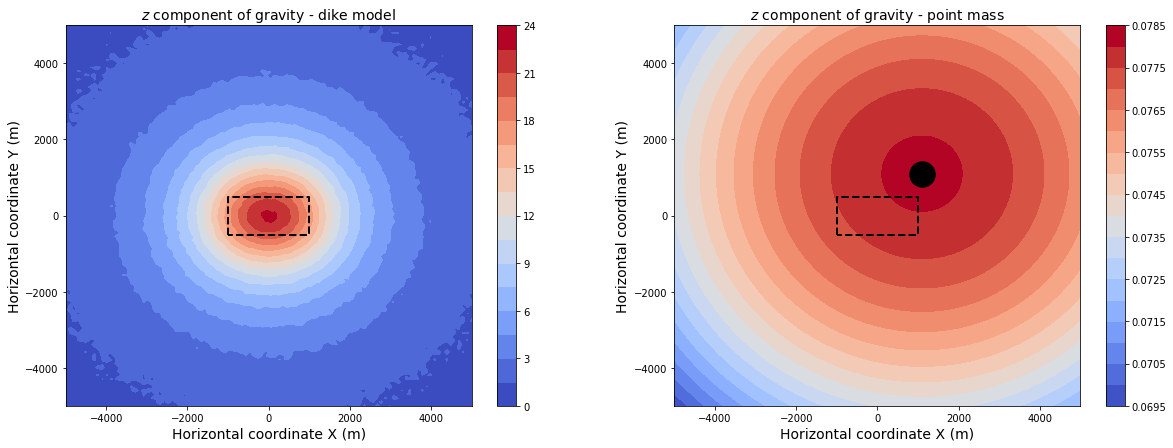

In [11]:
# Ploting all results obtained so far:
plt.close('all')
plt.figure(figsize=(20,7))

fs = 14
#############################################################################
plt.subplot(1, 2, 1)
plt.title('$z$ component of gravity - dike model ', fontsize = fs)
p1 = plt.contourf(xobs, yobs, gz_real, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_real), vmax = np.max(gz_real))
cbar1 = fig.colorbar(p1, aspect=10, fraction = 0.001, orientation="vertical")
cbar1.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.colorbar()
# -------- plot the dike outcrop into the contor map ---------------------:
rectangle(area, style='--k', linewidth=2, fill= None, alpha=1., label=None)
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)
#############################################################################
plt.subplot(1, 2, 2)
plt.title('$z$ component of gravity - point mass ', fontsize = fs)
#p2 = plt.contourf(xobs, yobs, gz_pred, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_real), vmax = np.max(gz_real))
p2 = plt.contourf(xobs, yobs, gz_pred, 20, cmap = plt.cm.coolwarm, vmin = np.min(gz_pred), vmax = np.max(gz_pred))
cbar2 = fig.colorbar(p2, aspect=10, fraction = 0.001, orientation="vertical")
cbar2.set_label('$g_z $ ( $ mGal$ )',fontsize=15, rotation = 90)
plt.colorbar(p2)
# -------- plot the dike outcrop into the contor map ---------------------:
rectangle(area, style='--k', linewidth=2, fill= None, alpha=1., label=None)

# -------- plot the point mass into the contor map ---------------------:
plt.scatter(xc, yc, s=rho, c='k', marker='.')
plt.ylabel('Horizontal coordinate Y (m)', fontsize = fs)
plt.xlabel('Horizontal coordinate X (m)', fontsize = fs)

#plt.savefig('figures/prism-gravity')

plt.show()

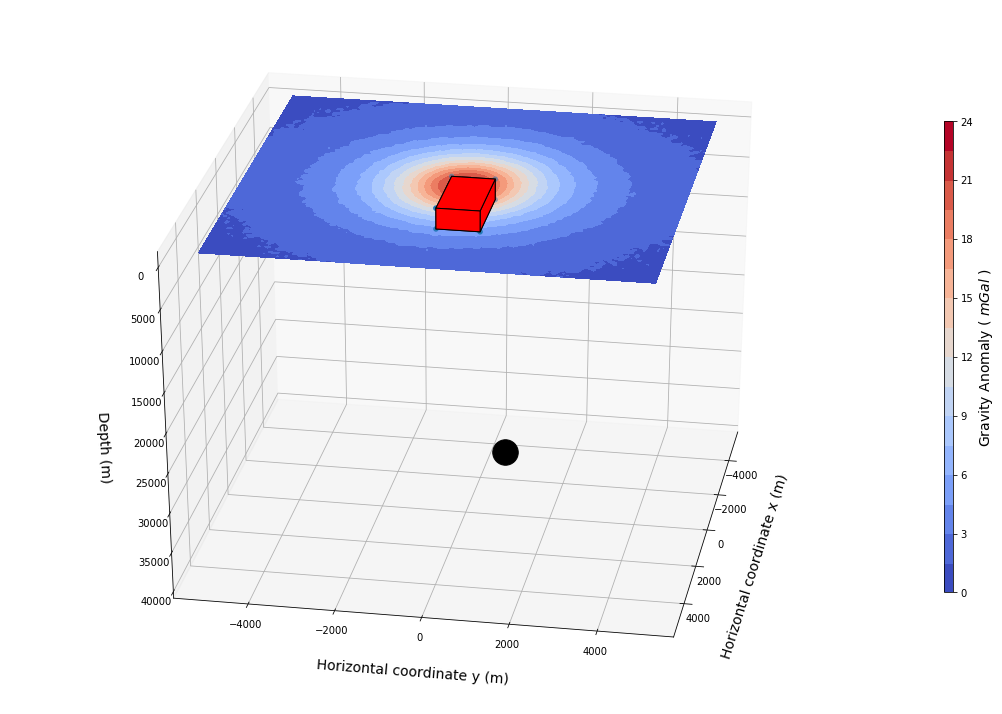

In [12]:
# 3D plot :
# ---------- Plot of model and data in slice ---------------------------------:
py.rcParams['contour.negative_linestyle'] = 'solid'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')

# ------------------- vertical gravitational atraction plot ------------------:
p1 = ax.contourf(xobs, yobs, gz_real, 20, zdir='z', 
                offset=np.min(z), cmap='coolwarm', vmin = np.min(gz_real), vmax = np.max(gz_real) )
cbar = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
    
# vertices of a prism
x1, x2 = dike[0:2]
y1, y2 = dike[2:4]
z1, z2 = dike[4:6]
v = np.array([[x1, y1, z1], [x1, y2, z1], [x2, y2, z1],  [x2, y1, z1], 
              [x1, y1, z2], [x1, y2, z2], [x2, y2, z2],  [x2, y1, z2]])
ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

# add the point masses here:
ax.scatter3D(xc, yc, zc, s= rho, c='k',marker = '.')


# generate list of sides of our prism
verts = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='red', linewidths=1, edgecolors='k', alpha=0.9))

#change size projection
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

#labels
ax.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
ax.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
ax.set_zlim(-1000,40000)
ax.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)

#visualization angle
ax.view_init(30, 10)
ax.invert_zaxis()
plt.tight_layout(True)
plt.show()


### Conclusão: Este é o conceito de espaço nulo, que consiste em um conjunto específico de parâmetros do modelo utilizado (massas pontuais) que não produz qualquer alteração nos dados calculados. Isso significa que alguns dos parâmetros utilizados (zc muito profundo) para o teste não produzem qualquer alteração na gravidade. 


## Test #02: using the click method for creating a vertical line of masses:

In [13]:
# --------- import external package for interactive plotting ---------:
from modules.iplots import model_masses

In [14]:
#--------- define the plotting area for both (x,y) and (depth, density)---------:
xmin = data.min()[0]
ymin = data.min()[1]
xmax = data.max()[0]
ymax = data.max()[1]
print xmin, xmax, ymin, ymax
area1 = [xmin, xmax, ymin, ymax]
area2 = [1000.0, 3000.0, -500.0, 5000.0]

-5000.0 5000.0 -5000.0 5000.0


In [15]:
# call function for picking x,y,z,rho values from the plot areas:
%matplotlib tk
xc,yc,zc,rho = model_masses(area1, area2)

In [16]:
print len(xc), len(yc), len(zc), len(rho)

10 10 10 10


In [20]:
# ------- compute gravity data for all clicked point masses:
# Calculating the gravity attraction for all point masses:
gz = 0.0
# range of all masses:
for i in range( len(xc) ):
    source=[]
    source = ( [ xc[i],yc[i],zc[i],1000.0,rho[i] ] ) # calling one source a time:
    #print source
    gz += sphere_gz(xobs, yobs, zobs, source) # sum the effect of all masses 


In [24]:
# 3D plot :
# ---------- Plot of model and data in slice ---------------------------------:
py.rcParams['contour.negative_linestyle'] = 'solid'
plt.close('all')
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d')

# ------------------- vertical gravitational atraction plot ------------------:
p1 = ax.contour(xobs, yobs, gz, 20, zdir='z', 
                offset=np.min(zobs), cmap='coolwarm', vmin = np.min(gz_real), vmax = np.max(gz_real) )
cbar = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=fs, rotation = 90)
    
# vertices of a prism
x1, x2 = dike[0:2]
y1, y2 = dike[2:4]
z1, z2 = dike[4:6]
v = np.array([[x1, y1, z1], [x1, y2, z1], [x2, y2, z1],  [x2, y1, z1], 
              [x1, y1, z2], [x1, y2, z2], [x2, y2, z2],  [x2, y1, z2]])
ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

# add the point masses here:
ax.scatter3D(xc, yc, zc, s= rho, c='k',marker = '.')


# generate list of sides of our prism
verts = [[v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]]]

# plot sides
ax.add_collection3d(Poly3DCollection(verts,facecolors='red', linewidths=1, edgecolors='k', alpha=0.9))

#change size projection
x_scale=1.
y_scale=1.
z_scale=1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj=short_proj

#labels
ax.set_xlabel('Horizontal coordinate x (m)', labelpad=20 ,fontsize=fs)
ax.set_ylabel('Horizontal coordinate y (m)', labelpad=20 ,fontsize=fs)
ax.set_zlim(-700,6000)
ax.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)

#visualization angle
ax.view_init(30, 10)
ax.invert_zaxis()
plt.tight_layout(True)
plt.show()